# Time series model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *

In [2]:
from google.colab import files
uploaded =files.upload()

Saving cleaned_arizona.csv to cleaned_arizona.csv


In [3]:
import io
df=pd.read_csv(io.BytesIO(uploaded['cleaned_arizona.csv']))

df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.0,2524.61,4778.24,825.21,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2021-12-14,0.0,6015.35,8582.52,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2021-12-14,0.0,3506.42,5686.56,754.34,85.16,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2021-12-14,0.0,7545.43,14232.63,1358.43,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,2021-12-14,0.0,5175.82,12250.35,16518.12,5894.94,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [4]:
df

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.00,2524.61,4778.24,825.21,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2021-12-14,0.00,6015.35,8582.52,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2021-12-14,0.00,3506.42,5686.56,754.34,85.16,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2021-12-14,0.00,7545.43,14232.63,1358.43,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,2021-12-14,0.00,5175.82,12250.35,16518.12,5894.94,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,2000-12-26,23136.48,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7661,2000-12-26,39839.23,0.00,0.00,0.00,0.00,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7662,2000-12-26,8128.06,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7663,2000-12-26,10032.48,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [5]:
df.iloc[[7]]

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
7,2021-12-07,0.0,6048.86,8549.01,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [6]:
new_df=df[0::8]
new_df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
0,2021-12-14,0.0,2524.61,4778.24,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8,2021-12-07,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
16,2021-11-30,0.0,6048.86,8549.01,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
24,2021-11-23,0.0,1676.56,3118.58,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32,2021-11-16,0.0,2514.26,4788.59,825.21,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [7]:
new_df.shape

(959, 22)

In [9]:
df.index=pd.to_datetime(df['validstart'], format = '%Y.%m.%d')
df.head()

,validstart,none,d0,d1,d2,d3,d4,region_east_central,region_north_central,region_northeast,region_northwest,region_south_central,region_southeast,region_southwest,climatedivisionsid_201,climatedivisionsid_202,climatedivisionsid_203,climatedivisionsid_204,climatedivisionsid_205,climatedivisionsid_206,climatedivisionsid_207,is_drought_area
validstart,,,,,,,,,,,,,,,,,,,,,,
2021-12-14,2021-12-14,0.0,2524.61,4778.24,825.21,0.00,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2021-12-14,2021-12-14,0.0,6015.35,8582.52,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2021-12-14,2021-12-14,0.0,3506.42,5686.56,754.34,85.16,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2021-12-14,2021-12-14,0.0,7545.43,14232.63,1358.43,0.00,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2021-12-14,2021-12-14,0.0,5175.82,12250.35,16518.12,5894.94,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


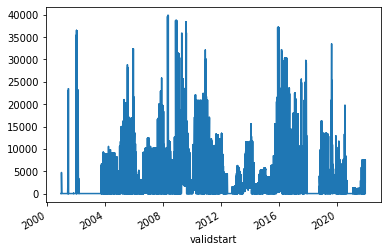

In [10]:
abnormally_dry=df['d0']

abnormally_dry.plot();

In [21]:
def df_to_X_y(df,window_size=4):
  df_as_np=df.to_numpy()
  X=[]
  y=[]

  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+4]]
    X.append(row)
    label =df_as_np[i+4]
    y.append(label)
  return np.array(X), np.array(y)


In [22]:
WINDOW_SIZE =4
X,y = df_to_X_y(abnormally_dry, WINDOW_SIZE)

In [23]:
X.shape, y.shape

((7661, 4, 1), (7661,))

In [24]:
X

array([[[2524.61],
        [6015.35],
        [3506.42],
        [7545.43]],

       [[6015.35],
        [3506.42],
        [7545.43],
        [5175.82]],

       [[3506.42],
        [7545.43],
        [5175.82],
        [1690.2 ]],

       ...,

       [[   0.  ],
        [   0.  ],
        [   0.  ],
        [   0.  ]],

       [[   0.  ],
        [   0.  ],
        [   0.  ],
        [   0.  ]],

       [[   0.  ],
        [   0.  ],
        [   0.  ],
        [   0.  ]]])

In [25]:
X_train, y_train = X[:5362], y[:5362]
X_val, y_val = X[5362:6510], y[5362:6510]
X_test, y_test = X[6510:], y[6510:] 

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5362, 4, 1), (5362,), (1148, 4, 1), (1148,), (1151, 4, 1), (1151,))

In [26]:
model1 = Sequential()

model1.add(InputLayer((4,1)))

model1.add(LSTM(64))

model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.python.keras.backend import learning_phase
cp1=ModelCheckpoint('model1/', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=.0001), metrics=[RootMeanSquaredError()])

In [28]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
159/168 [===========================>..] - ETA: 0s - loss: 41182384.0000 - root_mean_squared_error: 6417.3501

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 9s 39ms/step - loss: 41570972.0000 - root_mean_squared_error: 6447.5557 - val_loss: 35194228.0000 - val_root_mean_squared_error: 5932.4722
Epoch 2/10
164/168 [============================>.] - ETA: 0s - loss: 41930984.0000 - root_mean_squared_error: 6475.4136

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 33ms/step - loss: 41557824.0000 - root_mean_squared_error: 6446.5356 - val_loss: 35176644.0000 - val_root_mean_squared_error: 5930.9902
Epoch 3/10
161/168 [===========================>..] - ETA: 0s - loss: 41584000.0000 - root_mean_squared_error: 6448.5659

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 36ms/step - loss: 41533484.0000 - root_mean_squared_error: 6444.6475 - val_loss: 35145032.0000 - val_root_mean_squared_error: 5928.3247
Epoch 4/10
161/168 [===========================>..] - ETA: 0s - loss: 41329768.0000 - root_mean_squared_error: 6428.8232

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 34ms/step - loss: 41499400.0000 - root_mean_squared_error: 6442.0029 - val_loss: 35111824.0000 - val_root_mean_squared_error: 5925.5229
Epoch 5/10
160/168 [===========================>..] - ETA: 0s - loss: 41405040.0000 - root_mean_squared_error: 6434.6748

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 5s 32ms/step - loss: 41465252.0000 - root_mean_squared_error: 6439.3521 - val_loss: 35072936.0000 - val_root_mean_squared_error: 5922.2407
Epoch 6/10
164/168 [============================>.] - ETA: 0s - loss: 41285676.0000 - root_mean_squared_error: 6425.3931

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 35ms/step - loss: 41425104.0000 - root_mean_squared_error: 6436.2339 - val_loss: 35031220.0000 - val_root_mean_squared_error: 5918.7178
Epoch 7/10
158/168 [===========================>..] - ETA: 0s - loss: 41419732.0000 - root_mean_squared_error: 6435.8164

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 35ms/step - loss: 41379676.0000 - root_mean_squared_error: 6432.7036 - val_loss: 34981304.0000 - val_root_mean_squared_error: 5914.4995
Epoch 8/10
156/168 [==========================>...] - ETA: 0s - loss: 41702744.0000 - root_mean_squared_error: 6457.7661

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 33ms/step - loss: 41322064.0000 - root_mean_squared_error: 6428.2241 - val_loss: 34920124.0000 - val_root_mean_squared_error: 5909.3252
Epoch 9/10
159/168 [===========================>..] - ETA: 0s - loss: 41583640.0000 - root_mean_squared_error: 6448.5376

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 6s 36ms/step - loss: 41257932.0000 - root_mean_squared_error: 6423.2339 - val_loss: 34860900.0000 - val_root_mean_squared_error: 5904.3120
Epoch 10/10
168/168 [==============================] - ETA: 0s - loss: 41191704.0000 - root_mean_squared_error: 6418.0762

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


168/168 [==============================] - 5s 33ms/step - loss: 41191704.0000 - root_mean_squared_error: 6418.0762 - val_loss: 34796124.0000 - val_root_mean_squared_error: 5898.8237


In [29]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [30]:
train_predictions = model1.predict(X_train).flatten()

train_results=pd.DataFrame(data={'Train Predictions': train_predictions, 'Actual':y_train})

train_results

,Train Predictions,Actual
0,58.330696,5175.82
1,58.330696,1690.20
2,58.331177,0.00
3,69.860222,6048.86
4,62.296753,2514.26
...,...,...
5357,59.469063,10077.62
5358,58.781494,0.00
5359,69.892265,0.00
5360,72.274109,718.00


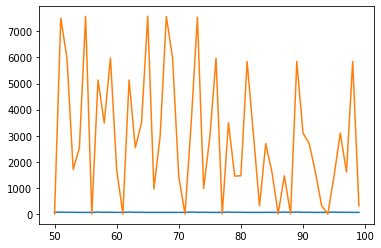

In [31]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actual'][50:100]);

In [32]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actual':y_val})
val_results

,Val Predictions,Actual
0,58.770519,10077.62
1,58.590809,0.00
2,69.859291,0.00
3,72.274109,0.00
4,72.640923,1471.79
...,...,...
1143,72.274124,5562.99
1144,63.350677,0.00
1145,69.297134,0.00
1146,72.100121,5562.99


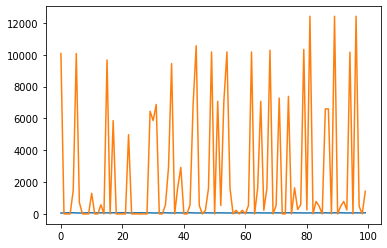

In [33]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100]);

In [34]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actual':y_test})
test_results

,Test Predictions,Actual
0,69.297134,8865.07
1,62.272655,0.00
2,71.591087,3057.21
3,62.272655,5562.99
4,62.289394,3057.21
...,...,...
1146,67.513939,0.00
1147,67.513939,0.00
1148,67.513939,0.00
1149,67.513939,0.00


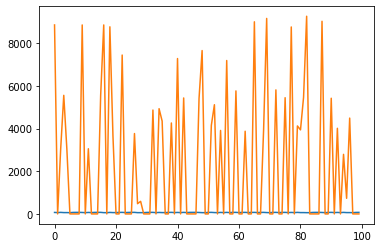

In [35]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actual'][:100])

In [36]:
from tensorflow.python.keras.losses import mean_squared_error
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mean_squared_error(y, predictions)

(      Predictions  Actuals
 0       69.297134  8865.07
 1       62.272655     0.00
 2       71.591087  3057.21
 3       62.272655  5562.99
 4       62.289394  3057.21
 ...           ...      ...
 1146    67.513939     0.00
 1147    67.513939     0.00
 1148    67.513939     0.00
 1149    67.513939     0.00
 1150    67.513939     0.00
 
 [1151 rows x 2 columns],
 <tf.Tensor: shape=(), dtype=float32, numpy=12149191.0>)

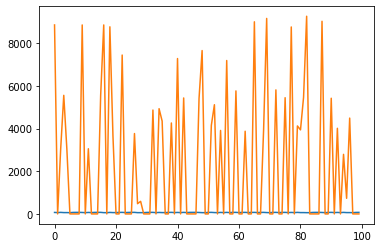

In [37]:
plot_predictions1(model1, X_test, y_test)